# Algunas Visus del TP1
### pasando en limpio

In [1]:
!pip install pandas_profiling

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:20,.2f}'.format # sin notación científica

In [3]:
df = pd.read_csv('Entrenamieto_ECI_2020.csv')

# Procesamiento para visus

### Cantidad de Productos por Stage won/lost, y por Region

In [4]:
df_wonLostCompleto=df[(df['Stage']=='Closed Won')|(df['Stage']=='Closed Lost')]
df_wonLostCompleto

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,"5,272,800.00",EUR,"5,272,800.00",Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,"48,230.00",EUR,"48,230.00",Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,"83,865.60",USD,"83,865.60",Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,"7,421,881.50",USD,"7,421,881.50",Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,"13,357,192.50",USD,"13,357,192.50",Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,Q1,2016,NaT,0,EUR,"103,350.00",EUR,"299,715.00",Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,Q2,2016,NaT,0,EUR,"93,015.00",EUR,"299,715.00",Closed Won,Prod_Category_A_None
16944,8792,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,Q1,2016,NaT,0,EUR,"103,350.00",EUR,"299,715.00",Closed Won,Prod_Category_A_None
16945,28561,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,10/20/2015,...,Q2,2016,NaT,4,USD,"2,346,796.88",USD,0.00,Closed Lost,Prod_Category_A_None


In [5]:
g_oppt2=df_wonLostCompleto[['Stage','Region','ID']].groupby(['Stage','Region']).agg('count')
g_oppt2

ID
Stage       Region           
Closed Lost APAC         1355
            Americas     2140
            EMEA         2189
            Japan        1546
            Middle East   120
Closed Won  APAC         1896
            Americas     1793
            EMEA         2471
            Japan        3323
            Middle East    50

In [6]:
g_oppt2.reset_index(inplace=True)
g_oppt2.columns=['Stage','Region','Cantidad de Productos']
g_oppt2

,Stage,Region,Cantidad de Productos
0,Closed Lost,APAC,1355
1,Closed Lost,Americas,2140
2,Closed Lost,EMEA,2189
3,Closed Lost,Japan,1546
4,Closed Lost,Middle East,120
5,Closed Won,APAC,1896
6,Closed Won,Americas,1793
7,Closed Won,EMEA,2471
8,Closed Won,Japan,3323
9,Closed Won,Middle East,50


In [7]:
# Graficando desde acá me queda Won en rojo, no me funcionaron las opciones de
# seaborn que creí que servían para cambiar el orden de colores.
# Df es pequeño, reordeno.
g_oppt2_ordenadoPGraf=g_oppt2.sort_values('Stage',ascending=False)
g_oppt2_ordenadoPGraf

,Stage,Region,Cantidad de Productos
5,Closed Won,APAC,1896
6,Closed Won,Americas,1793
7,Closed Won,EMEA,2471
8,Closed Won,Japan,3323
9,Closed Won,Middle East,50
0,Closed Lost,APAC,1355
1,Closed Lost,Americas,2140
2,Closed Lost,EMEA,2189
3,Closed Lost,Japan,1546
4,Closed Lost,Middle East,120


Text(0.5, 1.0, 'Cantidad de Productos Closed Won y Closed Lost según Región')

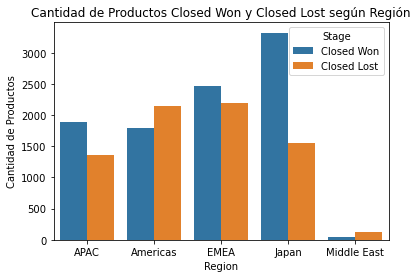

In [8]:
ax = sns.barplot(x="Region", y="Cantidad de Productos", hue="Stage", data=g_oppt2_ordenadoPGraf)
ax.set_title('Cantidad de Productos Closed Won y Closed Lost según Región')

### Diferencia de tiempo entre Last_Modified_Date y Opportunuty_Created_Date
Asumiendo, la hipótesis es que, last modified es la fecha de won o de lost (xq la columna de actual delivery date no anda)

In [9]:
df_deltaFechasDias=df_wonLostCompleto[['Stage','Last_Modified_Date','Opportunity_Created_Date']]

In [10]:
df_deltaFechasDias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16883 entries, 0 to 16946
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Stage                     16883 non-null  object
 1   Last_Modified_Date        16883 non-null  object
 2   Opportunity_Created_Date  16883 non-null  object
dtypes: object(3)
memory usage: 527.6+ KB


In [11]:
df_deltaFechasDias['delta']=(pd.to_datetime(df_deltaFechasDias['Last_Modified_Date'],errors='coerce')\
                             -pd.to_datetime(df_deltaFechasDias['Opportunity_Created_Date'],errors='coerce'))
df_deltaFechasDias['dias activa']=df_deltaFechasDias['delta'].dt.days
df_deltaFechasDias

<ipython-input-11-ad550f327bf9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deltaFechasDias['delta']=(pd.to_datetime(df_deltaFechasDias['Last_Modified_Date'],errors='coerce')\
<ipython-input-11-ad550f327bf9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deltaFechasDias['dias activa']=df_deltaFechasDias['delta'].dt.days


,Stage,Last_Modified_Date,Opportunity_Created_Date,delta,dias activa
0,Closed Lost,6/13/2016,12/7/2015,189 days,189
1,Closed Won,1/15/2016,12/7/2015,39 days,39
2,Closed Won,9/29/2016,12/8/2015,296 days,296
3,Closed Lost,3/27/2018,12/8/2015,840 days,840
4,Closed Lost,3/27/2018,12/8/2015,840 days,840
...,...,...,...,...,...
16942,Closed Won,1/19/2016,12/4/2015,46 days,46
16943,Closed Won,1/19/2016,12/4/2015,46 days,46
16944,Closed Won,1/19/2016,12/4/2015,46 days,46
16945,Closed Lost,1/22/2016,12/5/2015,48 days,48


Separo y grafico por separado las lost y las won

In [12]:
df_deltaFechasDias_won=df_deltaFechasDias[df_deltaFechasDias['Stage']=='Closed Won']
df_deltaFechasDias_won.head(4)

,Stage,Last_Modified_Date,Opportunity_Created_Date,delta,dias activa
1,Closed Won,1/15/2016,12/7/2015,39 days,39
2,Closed Won,9/29/2016,12/8/2015,296 days,296
7,Closed Won,12/9/2015,12/9/2015,0 days,0
23,Closed Won,1/7/2016,12/9/2015,29 days,29


In [13]:
df_deltaFechasDias_lost=df_deltaFechasDias[df_deltaFechasDias['Stage']=='Closed Lost']
df_deltaFechasDias_lost.head(4)

,Stage,Last_Modified_Date,Opportunity_Created_Date,delta,dias activa
0,Closed Lost,6/13/2016,12/7/2015,189 days,189
3,Closed Lost,3/27/2018,12/8/2015,840 days,840
4,Closed Lost,3/27/2018,12/8/2015,840 days,840
5,Closed Lost,3/27/2018,12/8/2015,840 days,840


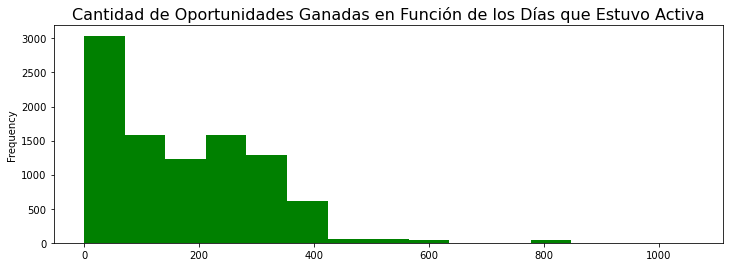

In [16]:
fig=plt.figure()
#ax=fig.add.subplot(111)
plt.title('Cantidad de Oportunidades Ganadas en Función de los Días que Estuvo Activa',fontsize=16)
ax.set_xlabel('Oportunidades Closed Won')
df_deltaFechasDias_won['dias activa'].plot.hist(color='green',figsize=(12,4),bins=15)
plt.show()

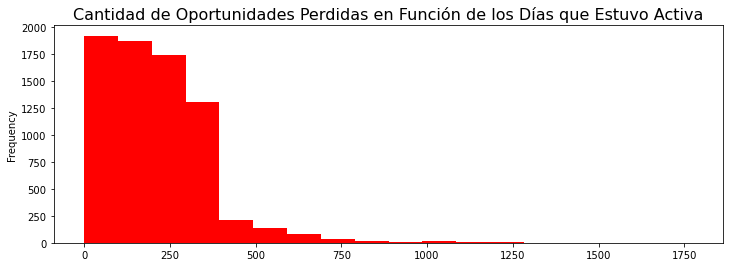

In [17]:
fig=plt.figure()
#ax=fig.add.subplot(111)
plt.title('Cantidad de Oportunidades Perdidas en Función de los Días que Estuvo Activa',fontsize=16)
ax.set_xlabel('Oportunidades Closed Lost')
df_deltaFechasDias_lost['dias activa'].plot.hist(color='red',figsize=(12,4),bins=18)
plt.show()